In [1]:
from matminer.datasets import load_dataset

df=load_dataset('elastic_tensor_2015',data_home='../dataset_4/')

In [2]:
df.head()

,material_id,formula,nsites,space_group,volume,structure,elastic_anisotropy,G_Reuss,G_VRH,G_Voigt,K_Reuss,K_VRH,K_Voigt,poisson_ratio,compliance_tensor,elastic_tensor,elastic_tensor_original,cif,kpoint_density,poscar
0,mp-10003,Nb4CoSi,12,124,194.419802,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",0.030688,96.844535,97.141604,97.438674,194.267623,194.268884,194.270146,0.285701,"[[0.004385293093993, -0.0016070693558990002, -...","[[311.33514638650246, 144.45092552856926, 126....","[[311.33514638650246, 144.45092552856926, 126....",#\#CIF1.1\n###################################...,7000,Nb8 Co2 Si2\n1.0\n6.221780 0.000000 0.000000\n...
1,mp-10010,Al(CoSi)2,5,164,61.987320,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",0.266910,93.939650,96.252006,98.564362,173.647763,175.449907,177.252050,0.268105,"[[0.0037715428949660003, -0.000844229828709, -...","[[306.93357350984974, 88.02634955100905, 105.6...","[[306.93357350984974, 88.02634955100905, 105.6...",#\#CIF1.1\n###################################...,7000,Al1 Co2 Si2\n1.0\n3.932782 0.000000 0.000000\n...
2,mp-10015,SiOs,2,221,25.952539,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",0.756489,120.962289,130.112955,139.263621,295.077545,295.077545,295.077545,0.307780,"[[0.0019959391925840004, -0.000433146670736000...","[[569.5291276937579, 157.8517489654999, 157.85...","[[569.5291276937579, 157.8517489654999, 157.85...",#\#CIF1.1\n###################################...,7000,Si1 Os1\n1.0\n2.960692 0.000000 0.000000\n0.00...
3,mp-10021,Ga,4,63,76.721433,"[[0. 1.09045794 0.84078375] Ga, [0. ...",2.376805,12.205989,15.101901,17.997812,49.025963,49.130670,49.235377,0.360593,"[[0.021647143908635, -0.005207263618160001, -0...","[[69.28798774976904, 34.7875015216915, 37.3877...","[[70.13259066665267, 40.60474945058445, 37.387...",#\#CIF1.1\n###################################...,7000,Ga4\n1.0\n2.803229 0.000000 0.000000\n0.000000...
4,mp-10025,SiRu2,12,62,160.300999,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",0.196930,100.110773,101.947798,103.784823,255.055257,256.768081,258.480904,0.324682,"[[0.00410214297725, -0.001272204332729, -0.001...","[[349.3767766177825, 186.67131003104407, 176.4...","[[407.4791016459293, 176.4759188081947, 213.83...",#\#CIF1.1\n###################################...,7000,Si4 Ru8\n1.0\n4.037706 0.000000 0.000000\n0.00...


In [3]:
to_keep=['formula','structure','K_VRH']
df=df[to_keep]

In [4]:
df

,formula,structure,K_VRH
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081
...,...,...,...
1176,Ti2CdC,"[[1.55171489 0.89588144 8.41159136] Ti, [-1.88...",111.788114
1177,ScSi,"[[0. 8.53417539 0.91740975] Sc, [0. ...",101.326807
1178,YSi,"[[0. 9.084549 0.960921] Y, [0. 1.4...",89.418161
1179,Al2Cu,"[[5.11035838 2.07486738 0. ] Al, [3.996...",99.384565


In [5]:
from matminer.featurizers.conversions import StrToComposition as Str2Com

In [6]:
df=Str2Com().featurize_dataframe(df,'formula')

StrToComposition:   0%|          | 0/1181 [00:00<?, ?it/s]

In [7]:
from matminer.featurizers.composition import ElementProperty
ep_feat=ElementProperty.from_preset(preset_name='magpie')
df=ep_feat.featurize_dataframe(df,col_id='composition')

ElementProperty:   0%|          | 0/1181 [00:00<?, ?it/s]

In [8]:
df

,formula,structure,K_VRH,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884,"(Nb, Co, Si)",14.0,41.0,27.0,34.166667,9.111111,41.0,...,1.548471,0.258079,0.430131,0.000000,194.0,229.0,35.0,222.833333,9.611111,229.0
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907,"(Al, Co, Si)",13.0,27.0,14.0,19.000000,6.400000,14.0,...,1.548471,0.619388,0.743266,0.000000,194.0,227.0,33.0,213.400000,15.520000,194.0
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545,"(Si, Os)",14.0,76.0,62.0,45.000000,31.000000,14.0,...,0.000000,0.000000,0.000000,0.000000,194.0,227.0,33.0,210.500000,16.500000,194.0
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670,(Ga),31.0,31.0,0.0,31.000000,0.000000,31.0,...,0.000000,0.000000,0.000000,0.000000,64.0,64.0,0.0,64.000000,0.000000,64.0
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081,"(Si, Ru)",14.0,44.0,30.0,34.000000,13.333333,44.0,...,0.000000,0.000000,0.000000,0.000000,194.0,227.0,33.0,205.000000,14.666667,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,Ti2CdC,"[[1.55171489 0.89588144 8.41159136] Ti, [-1.88...",111.788114,"(Ti, Cd, C)",6.0,48.0,42.0,24.500000,11.750000,22.0,...,0.000023,0.000011,0.000011,0.000023,194.0,194.0,0.0,194.000000,0.000000,194.0
1177,ScSi,"[[0. 8.53417539 0.91740975] Sc, [0. ...",101.326807,"(Sc, Si)",14.0,21.0,7.0,17.500000,3.500000,14.0,...,0.000006,0.000003,0.000003,0.000000,194.0,227.0,33.0,210.500000,16.500000,194.0
1178,YSi,"[[0. 9.084549 0.960921] Y, [0. 1.4...",89.418161,"(Y, Si)",14.0,39.0,25.0,26.500000,12.500000,14.0,...,0.000000,0.000000,0.000000,0.000000,194.0,227.0,33.0,210.500000,16.500000,194.0
1179,Al2Cu,"[[5.11035838 2.07486738 0. ] Al, [3.996...",99.384565,"(Al, Cu)",13.0,29.0,16.0,18.333333,7.111111,13.0,...,0.000000,0.000000,0.000000,0.000000,225.0,225.0,0.0,225.000000,0.000000,225.0


In [9]:
from matminer.featurizers.conversions import CompositionToOxidComposition as Com2OxCom
from matminer.featurizers.composition import OxidationStates as OxStat

In [10]:
df=Com2OxCom().featurize_dataframe(df,'composition')
df.head()

CompositionToOxidComposition:   0%|          | 0/1181 [00:00<?, ?it/s]

,formula,structure,K_VRH,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,...,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,composition_oxid
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884,"(Nb, Co, Si)",14.0,41.0,27.0,34.166667,9.111111,41.0,...,0.258079,0.430131,0.0,194.0,229.0,35.0,222.833333,9.611111,229.0,"(Nb0+, Co0+, Si0+)"
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907,"(Al, Co, Si)",13.0,27.0,14.0,19.000000,6.400000,14.0,...,0.619388,0.743266,0.0,194.0,227.0,33.0,213.400000,15.520000,194.0,"(Al3+, Co2+, Co3+, Si4-)"
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545,"(Si, Os)",14.0,76.0,62.0,45.000000,31.000000,14.0,...,0.000000,0.000000,0.0,194.0,227.0,33.0,210.500000,16.500000,194.0,"(Si4-, Os4+)"
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670,(Ga),31.0,31.0,0.0,31.000000,0.000000,31.0,...,0.000000,0.000000,0.0,64.0,64.0,0.0,64.000000,0.000000,64.0,(Ga0+)
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081,"(Si, Ru)",14.0,44.0,30.0,34.000000,13.333333,44.0,...,0.000000,0.000000,0.0,194.0,227.0,33.0,205.000000,14.666667,194.0,"(Si4-, Ru2+)"


In [11]:
os_feat=OxStat()
df=os_feat.featurize_dataframe(df,'composition_oxid')
df.head()

OxidationStates:   0%|          | 0/1181 [00:00<?, ?it/s]

,formula,structure,K_VRH,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,...,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884,"(Nb, Co, Si)",14.0,41.0,27.0,34.166667,9.111111,41.0,...,229.0,35.0,222.833333,9.611111,229.0,"(Nb0+, Co0+, Si0+)",0,0,0,0.000000
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907,"(Al, Co, Si)",13.0,27.0,14.0,19.000000,6.400000,14.0,...,227.0,33.0,213.400000,15.520000,194.0,"(Al3+, Co2+, Co3+, Si4-)",-4,3,7,3.872983
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545,"(Si, Os)",14.0,76.0,62.0,45.000000,31.000000,14.0,...,227.0,33.0,210.500000,16.500000,194.0,"(Si4-, Os4+)",-4,4,8,5.656854
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670,(Ga),31.0,31.0,0.0,31.000000,0.000000,31.0,...,64.0,0.0,64.000000,0.000000,64.0,(Ga0+),0,0,0,0.000000
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081,"(Si, Ru)",14.0,44.0,30.0,34.000000,13.333333,44.0,...,227.0,33.0,205.000000,14.666667,194.0,"(Si4-, Ru2+)",-4,2,6,4.242641


In [12]:
from matminer.featurizers.structure import DensityFeatures as DenFea

In [13]:
df_feat=DenFea()

In [14]:
df=df_feat.featurize_dataframe(df,'structure')
df.head()

DensityFeatures:   0%|          | 0/1181 [00:00<?, ?it/s]

,formula,structure,K_VRH,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,...,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state,density,vpa,packing fraction
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884,"(Nb, Co, Si)",14.0,41.0,27.0,34.166667,9.111111,41.0,...,9.611111,229.0,"(Nb0+, Co0+, Si0+)",0,0,0,0.000000,7.834556,16.201654,0.688834
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907,"(Al, Co, Si)",13.0,27.0,14.0,19.000000,6.400000,14.0,...,15.520000,194.0,"(Al3+, Co2+, Co3+, Si4-)",-4,3,7,3.872983,5.384968,12.397466,0.644386
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545,"(Si, Os)",14.0,76.0,62.0,45.000000,31.000000,14.0,...,16.500000,194.0,"(Si4-, Os4+)",-4,4,8,5.656854,13.968635,12.976265,0.569426
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670,(Ga),31.0,31.0,0.0,31.000000,0.000000,31.0,...,0.000000,64.0,(Ga0+),0,0,0,0.000000,6.036267,19.180359,0.479802
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081,"(Si, Ru)",14.0,44.0,30.0,34.000000,13.333333,44.0,...,14.666667,194.0,"(Si4-, Ru2+)",-4,2,6,4.242641,9.539514,13.358418,0.598395


In [15]:
df_feat.feature_labels()

['density', 'vpa', 'packing fraction']

In [18]:
y=df['K_VRH'].values
excluded=['K_VRH','formula','structure','composition','composition_oxid']
X = df.drop(excluded,axis=1)

In [21]:
X

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,...,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state,density,vpa,packing fraction
0,14.0,41.0,27.0,34.166667,9.111111,41.0,47.0,78.0,31.0,54.000000,...,222.833333,9.611111,229.0,0,0,0,0.000000,7.834556,16.201654,0.688834
1,13.0,27.0,14.0,19.000000,6.400000,14.0,58.0,78.0,20.0,69.000000,...,213.400000,15.520000,194.0,-4,3,7,3.872983,5.384968,12.397466,0.644386
2,14.0,76.0,62.0,45.000000,31.000000,14.0,57.0,78.0,21.0,67.500000,...,210.500000,16.500000,194.0,-4,4,8,5.656854,13.968635,12.976265,0.569426
3,31.0,31.0,0.0,31.000000,0.000000,31.0,74.0,74.0,0.0,74.000000,...,64.000000,0.000000,64.0,0,0,0,0.000000,6.036267,19.180359,0.479802
4,14.0,44.0,30.0,34.000000,13.333333,44.0,56.0,78.0,22.0,63.333333,...,205.000000,14.666667,194.0,-4,2,6,4.242641,9.539514,13.358418,0.598395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,6.0,48.0,42.0,24.500000,11.750000,22.0,43.0,77.0,34.0,58.250000,...,194.000000,0.000000,194.0,0,0,0,0.000000,6.016734,15.190017,0.658712
1177,14.0,21.0,7.0,17.500000,3.500000,14.0,11.0,78.0,67.0,44.500000,...,210.500000,16.500000,194.0,0,0,0,0.000000,3.336856,18.174013,0.625414
1178,14.0,39.0,25.0,26.500000,12.500000,14.0,12.0,78.0,66.0,45.000000,...,210.500000,16.500000,194.0,0,0,0,0.000000,4.462773,21.765469,0.689264
1179,13.0,29.0,16.0,18.333333,7.111111,13.0,64.0,73.0,9.0,70.000000,...,225.000000,0.000000,225.0,0,0,0,0.000000,4.356814,14.928982,0.595452


In [22]:
y

array([194.26888436, 175.44990675, 295.07754499, ...,  89.41816126,
        99.3845653 ,  35.93865993])

In [25]:
#决策树回归
from sklearn import tree
from sklearn.metrics import mean_squared_error
import numpy as np

clf=tree.DecisionTreeRegressor()
clf=clf.fit(X,y)

print('training R2 = ' + str(round(clf.score(X,y),3)))
print('training RMSE =%3f'% np.sqrt(mean_squared_error(y_true=y,y_pred=clf.predict(X))))

training R2 = 1.0
training RMSE =0.000000


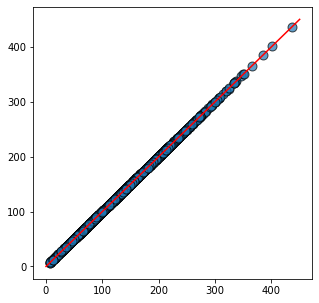

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot([0,450],[0,450],'r')
plt.scatter(y,clf.predict(X),s=80,edgecolor='k',alpha=0.7)
plt.show()

In [33]:
from sklearn.model_selection import KFold, cross_val_score

crossvalidation=KFold(n_splits=10,shuffle=True)
r2_scores=cross_val_score(clf,X,y,scoring='r2',cv=crossvalidation)
rmse_scores=cross_val_score(clf,X,y,scoring='neg_root_mean_squared_error',cv=crossvalidation)

print('Cross validation results:')
print('Fold: %i, mean R2: %.3f'%(len(r2_scores),np.mean(r2_scores)))
print('Fold: %i, mean RMSE: %.3f'%(len(rmse_scores),-np.mean(rmse_scores)))

Cross validation results:
Fold: 10, mean R2: 0.862
Fold: 10, mean RMSE: 26.500


In [35]:
from sklearn.model_selection import cross_val_predict
y_cv=cross_val_predict(clf,X,y,cv=crossvalidation)

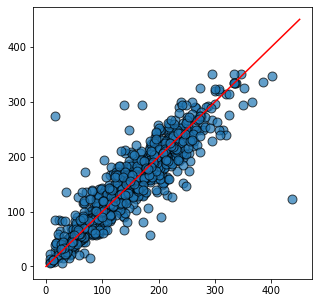

In [36]:
plt.figure(figsize=(5,5))
plt.plot([0,450],[0,450],'r')
plt.scatter(y,y_cv,s=80,edgecolor='k',alpha=0.7)
plt.show()

In [38]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=50,random_state=1)
rf.fit(X,y)
print('training R2 = ' + str(round(rf.score(X,y),3)))
print('training RMSE =%.3f'% np.sqrt(mean_squared_error(y_true=y,y_pred=rf.predict(X))))

training R2 = 0.989
training RMSE =7.669


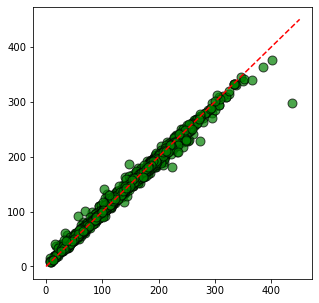

In [41]:
plt.figure(figsize=(5,5))
plt.plot([0,450],[0,450],'r--')
plt.scatter(y,rf.predict(X),s=80,c='g',edgecolor='k',alpha=0.7)
plt.show()

In [42]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=\
                                               0.2,random_state=1)

In [45]:
rf_reg=RandomForestRegressor(n_estimators=50,random_state=1)
rf_reg.fit(X_train,y_train)
print('train R2 = %.3f'% rf_reg.score(X_train,y_train))
print('train RMSE =%.3f'% np.sqrt(mean_squared_error(y_true=y_train,y_pred=rf_reg.predict(X_train))))
print('test R2 = %.3f'% rf_reg.score(X_test,y_test))
print('test RMSE =%.3f'% np.sqrt(mean_squared_error(y_true=y_test,y_pred=rf_reg.predict(X_test))))

train R2 = 0.987
train RMSE =8.218
test R2 = 0.941
test RMSE =17.013


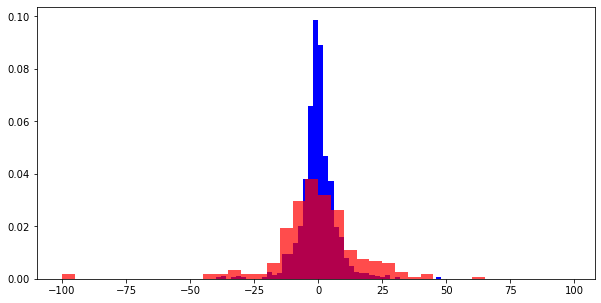

In [53]:
plt.figure(figsize=[10,5])
plt.hist(y_train-rf_reg.predict(X_train),color='b',bins=np.arange(-100,100,2),density=True)#画偏差

plt.hist(y_test-rf_reg.predict(X_test),color='r',bins=np.arange(-100,100,5),density=True,alpha = 0.7)
plt.show()

In [55]:
crossvalidation=KFold(n_splits=10,shuffle=True)
r2_scores=cross_val_score(rf,X,y,scoring='r2',cv=crossvalidation)
rmse_scores=cross_val_score(rf,X,y,scoring='neg_root_mean_squared_error',cv=crossvalidation)

print('Cross validation results:')
print('Fold: %i, mean R2: %.3f'%(len(r2_scores),np.mean(r2_scores)))
print('Fold: %i, mean RMSE: %.3f'%(len(rmse_scores),-np.mean(rmse_scores)))

Cross validation results:
Fold: 10, mean R2: 0.927
Fold: 10, mean RMSE: 19.391


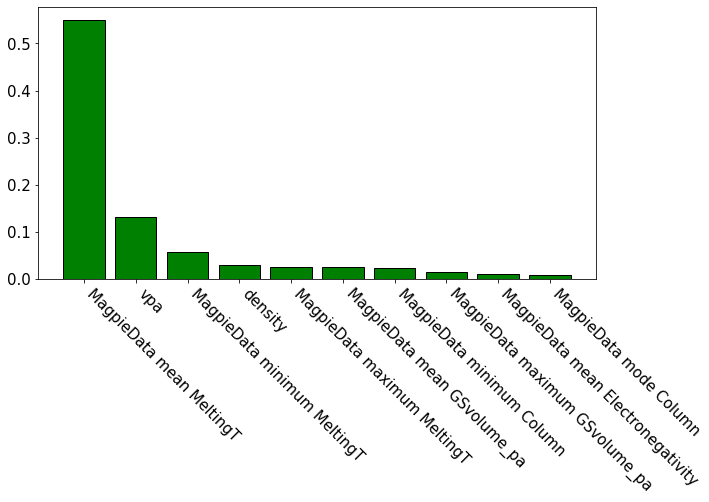

In [56]:
importances=rf.feature_importances_
imp_sort=np.argsort(importances)[::-1] #argsort排序 结果是索引，从小到大，-1变从大到小
feat_name=X.columns.values
plt.figure(figsize=[10,5])
plt.bar(x=feat_name[imp_sort][0:10],height=importances[imp_sort][0:10],color='g',edgecolor='k')
plt.xticks(rotation=-45,fontsize=15,ha='left') #x标签旋转-45°，坐标对齐
plt.yticks(fontsize=15)
plt.show()

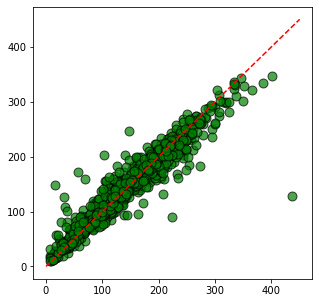

In [57]:
plt.figure(figsize=(5,5))
plt.plot([0,450],[0,450],'r--')
plt.scatter(y,cross_val_predict(rf,X,y,cv=crossvalidation),s=80,c='g',edgecolor='k',alpha=0.7)
plt.show()